# Section 3: Usage for Exponential Functions

In this section, we demonstrate how to use `pexp` and `qexp` to answer statistical questions related to the exponential distribution, using the `lung` dataset from the `survival` package in R.

If you'd like to follow along with this tutorial and perform the analysis on the same dataset, you can download the `lung` dataset from the `survival` package in R by using the following R code. This will allow you to export the dataset to a CSV file, which you can then load into your Python environment.

In your R console or R script, execute the following commands.

In [1]:
# %%R
# install.packages("survival")
# library(survival)
# df= survival::lung
# write.csv(df, file = "~/lung_dataset.csv", row.names = FALSE)

First, let's explore our dataset. The `lung` dataset is commonly used for survival analysis. It contains information about the survival of patients with lung cancer. We will focus on the `time` variable, which typically represents the survival time of the patients.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
file_path = "~/lung_dataset.csv"
lung_df = pd.read_csv(file_path)
lung_df.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Let's assume we want to answer two questions:

- What is the cumulative probability of survival up to the median survival time?
- What is the survival time above which only the top 5% of patients survive?

First, let's look at the distribution of survival times. We can visualize this with a histogram and determine if it closely resembles an exponential distribution.

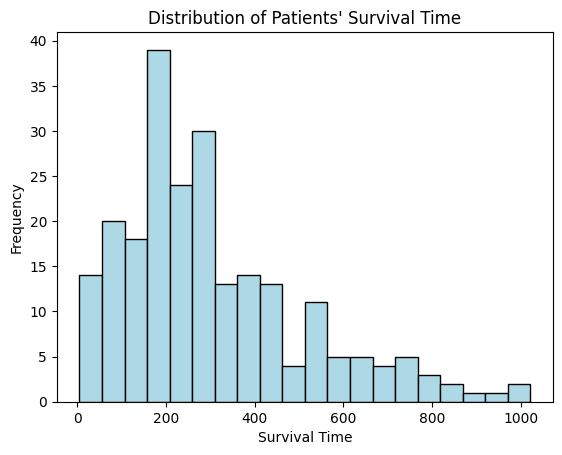

In [11]:
# Visualize the distribution of survival times
plt.hist(lung_df['time'], bins=20, color='lightblue', edgecolor='black')
plt.title("Distribution of Patients' Survival Time")
plt.xlabel('Survival Time')
plt.ylabel('Frequency')
plt.show()

From the plot above, we could see the distribution closely resemble an exponential pattern, making it suitable for analysis using our pexp and qexp functions to address our statistical inquiries.

In [12]:
from mathdistops import pexp, qexp
# Calculate the rate as the reciprocal of the mean time
rate = 1 / lung_df['time'].mean()

# Calculate the cumulative probability up to the median survival time
q = lung_df['time'].median()
df, fig = pexp(q, rate, graph=True)
df

,Quantile,Cumulative probability
0,255.5,0.567021


Let's analyze the results and address the first question:

Question: What is the cumulative probability of survival up to the median survival time?

Answer: Based on the output from the `pexp` function, we find that the cumulative probability of survival up to the median survival time (255.5 days) is approximately 0.567 or 56.7%. This indicates that about 56.7% of patients in this dataset are expected to survive up to 255.5 days.

In [13]:
fig

alt.HConcatChart(...)

In the output charts, the Probability Density Function (PDF) presents the distribution of survival times, highlighted by a shaded area under the curve up to the median survival time of 255.5 days, marked by a vertical dotted line. The shaded area in the PDF represents the probability, illustrating the likelihood of different survival times. On the Cumulative Distribution Function (CDF), the same vertical line intersects the curve, denoting that approximately 56.7% of patients are expected to survive up to this point. This visual distinction in the charts, with the shaded area under the PDF curve and the corresponding point on the CDF, provides a clear and intuitive understanding of the distribution of survival times and the cumulative probability up to the median survival time.